In [94]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [95]:
train_image_dir='TRAIN/train/'

In [96]:
df = pd.read_csv('TRAIN/train.anno.txt', delim_whitespace=True, header=None)

In [97]:
SIZE=200

X_dataset = []
for i in tqdm(range(df.shape[0])):
  img = image.load_img(train_image_dir+df[0][i],target_size=(SIZE,SIZE,3))
  img = image.img_to_array(img)
  img = img/255
  X_dataset.append(img)

X = np.array(X_dataset)  

100%|██████████| 1827/1827 [00:07<00:00, 251.62it/s]


In [98]:
Y = np.array(df.drop([0,1,2], axis=1))

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=20, test_size=0.1)

In [111]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(200,200,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='sigmoid'))

#model.summary()

In [112]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [115]:
history = model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
52/52 [==============================] - 2s 33ms/step - loss: 0.4286 - accuracy: 0.3054
Epoch 2/10
52/52 [==============================] - 2s 31ms/step - loss: 0.4390 - accuracy: 0.3206
Epoch 3/10
52/52 [==============================] - 2s 31ms/step - loss: 0.4267 - accuracy: 0.3169
Epoch 4/10
52/52 [==============================] - 2s 31ms/step - loss: 0.4140 - accuracy: 0.2895
Epoch 5/10
52/52 [==============================] - 2s 31ms/step - loss: 0.4128 - accuracy: 0.2956
Epoch 6/10
52/52 [==============================] - 2s 31ms/step - loss: 0.4033 - accuracy: 0.3120
Epoch 7/10
52/52 [==============================] - 2s 31ms/step - loss: 0.3937 - accuracy: 0.2908
Epoch 8/10
52/52 [==============================] - 2s 32ms/step - loss: 0.3955 - accuracy: 0.2664
Epoch 9/10
52/52 [==============================] - 2s 31ms/step - loss: 0.3871 - accuracy: 0.2835
Epoch 10/10
52/52 [==============================] - 2s 31ms/step - loss: 0.3826 - accuracy: 0.2725


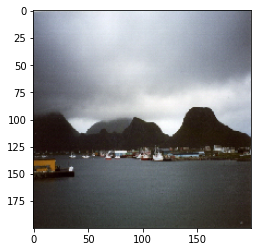

In [74]:
img = image.load_img('35-35269.jpg', target_size=(SIZE,SIZE,3))
img = image.img_to_array(img)
img = img/255
plt.imshow(img)
img = np.expand_dims(img, axis=0)

In [35]:
classes = np.array(['person', 'day', 'night', 'water', 'road', 
                    'vegetation', 'tree', 'mountains', 'beach', 'buildings', 
                    'sky', 'sunny', 'partly_cloudy', 'overcast', 'animal'])

In [36]:
classes

array(['person', 'day', 'night', 'water', 'road', 'vegetation', 'tree',
       'mountains', 'beach', 'buildings', 'sky', 'sunny', 'partly_cloudy',
       'overcast', 'animal'], dtype='<U13')

In [75]:
prob = model.predict(img)

In [76]:
prob

array([[0.96261245, 0.9434902 , 0.02992566, 0.48250687, 0.22532432,
        0.44942868, 0.26873958, 0.34143737, 0.16873224, 0.47622228,
        0.90024954, 0.13551995, 0.3901361 , 0.49753174, 0.09850021]],
      dtype=float32)